# Implementing additive models
Additive models are models that follow the format
- Y = f_1(X_1) + f_1(X_2) + ... + f_p(X_p) + epsilon 
  where y is the sum of different smoothness functions. Linear regression is an example where each of the functions works linearly to the output. The smoothness functions works to capture the non-linearity for each of the predictors. We will implement a generalized additive model that utilizes the smoothness functions to best account for variance in the dataframe. This is done by choosing a number of splines for each smoothness function. We will start looking at 20 splines as an example. To implement this we use the library pygam, and import LinearGAM, which provisdes s with a framework generalized addition models.  

In [92]:


import pandas as pd
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



df = pd.read_csv("klar_for_oppgave_5.csv")

from sklearn.model_selection import train_test_split

# Print the columns to debug
print(df.columns)

X = df[['PLS_Component_1', 'PLS_Component_2', 'PLS_Component_3', 'PLS_Component_4', 'PLS_Component_5', 'PLS_Component_8', 'PLS_Component_9', 'PLS_Component_10','PLS_Component_12' ]]
y = df['Close']

# Assuming X and y are your predictors (PLS components) and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the GAM model
gam = LinearGAM(s(0, n_splines=10, lam=0.1) + s(1, n_splines=10, lam=0.1) + 
                s(2, n_splines=10, lam=0.1) + s(3, n_splines=10, lam=0.1) + 
                s(4, n_splines=10, lam=0.1) + s(5, n_splines=10, lam=0.1) +
                s(6, n_splines=10, lam=0.1) + s(7, n_splines=10, lam=0.1) +
                s(8, n_splines=10, lam=0.1))
gam.fit(X_train, y_train)

Index(['Unnamed: 0', 'Close', 'PLS_Component_1', 'PLS_Component_2',
       'PLS_Component_3', 'PLS_Component_4', 'PLS_Component_5',
       'PLS_Component_8', 'PLS_Component_9', 'PLS_Component_10',
       'PLS_Component_12'],
      dtype='object')


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + intercept,
   tol=0.0001, verbose=False)

C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_41012\3031449218.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red', label='Ideal Prediction')
C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_41012\3031449218.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red', label='Ideal Prediction')
C:\Users\Erlend Sæveraas\AppData\Local\Temp\ipykernel_41012\3031449218.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k

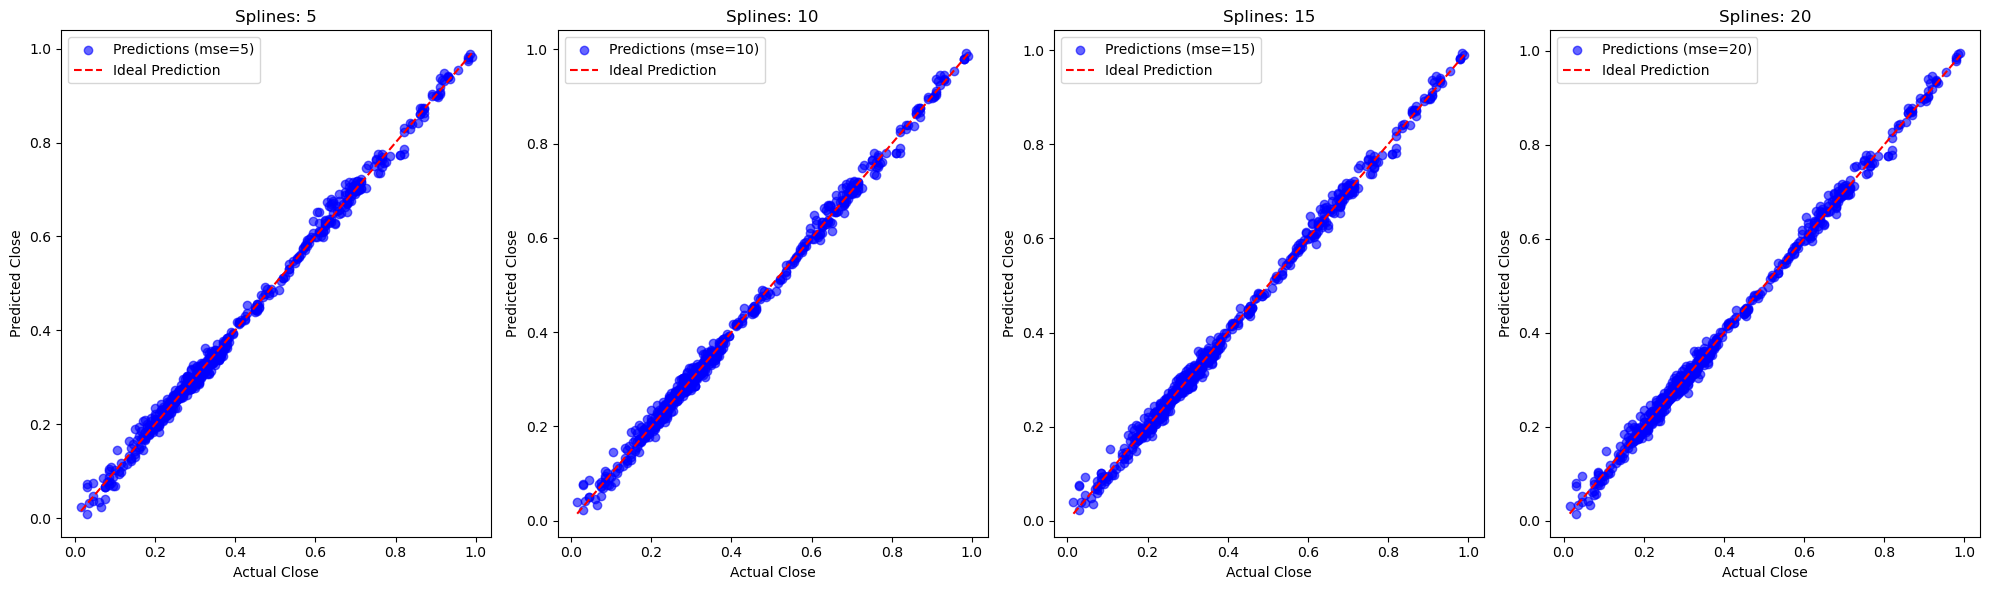

Mean Squared Error for splines=5: 0.00017887876917581795
Mean Squared Error for splines=10: 0.00016381592360285353
Mean Squared Error for splines=15: 0.0001578780620463414
Mean Squared Error for splines=20: 0.00015799383560517616


In [93]:
spline_counts = [5, 10, 15, 20]  # 4 values for subplots

# Create a plot with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Loop through each spline count and create a GAM model for each
for i, n_splines in enumerate(spline_counts):
    gam = LinearGAM(s(0, n_splines=n_splines, lam=0.1) + s(1, n_splines=n_splines, lam=0.1) + 
                    s(2, n_splines=n_splines, lam=0.1) + s(3, n_splines=n_splines, lam=0.1) + 
                    s(4, n_splines=n_splines, lam=0.1) + s(5, n_splines=n_splines, lam=0.1) +
                    s(6, n_splines=n_splines, lam=0.1) + s(7, n_splines=n_splines, lam=0.1) +
                    s(8, n_splines=n_splines, lam=0.1))
    
    # Fit the model to the training data
    gam.fit(X_train, y_train)
    
    # Generate predictions for the test dataset
    y_test_pred = gam.predict(X_test)
    
    # Plot Actual vs. Predicted values on the test set for this spline count
    ax = axes[i]
    ax.scatter(y_test, y_test_pred, label=f'Predictions (mse={n_splines})', alpha=0.6, color='blue')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red', label='Ideal Prediction')
    ax.set_title(f'Splines: {n_splines}')
    ax.set_xlabel('Actual Close')
    ax.set_ylabel('Predicted Close')
    ax.legend()

plt.tight_layout()
plt.show()

# Calculate and print the Mean Squared Error (MSE) for each spline configuration
for n_splines in spline_counts:
    gam = LinearGAM(s(0, n_splines=n_splines, lam=0.1) + s(1, n_splines=n_splines, lam=0.1) + 
                    s(2, n_splines=n_splines, lam=0.1) + s(3, n_splines=n_splines, lam=0.1) + 
                    s(4, n_splines=n_splines, lam=0.1) + s(5, n_splines=n_splines, lam=0.1) +
                    s(6, n_splines=n_splines, lam=0.1) + s(7, n_splines=n_splines, lam=0.1) +
                    s(8, n_splines=n_splines, lam=0.1))
    gam.fit(X_train, y_train)
    y_test_pred = gam.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"Mean Squared Error for splines={n_splines}: {mse_test}")

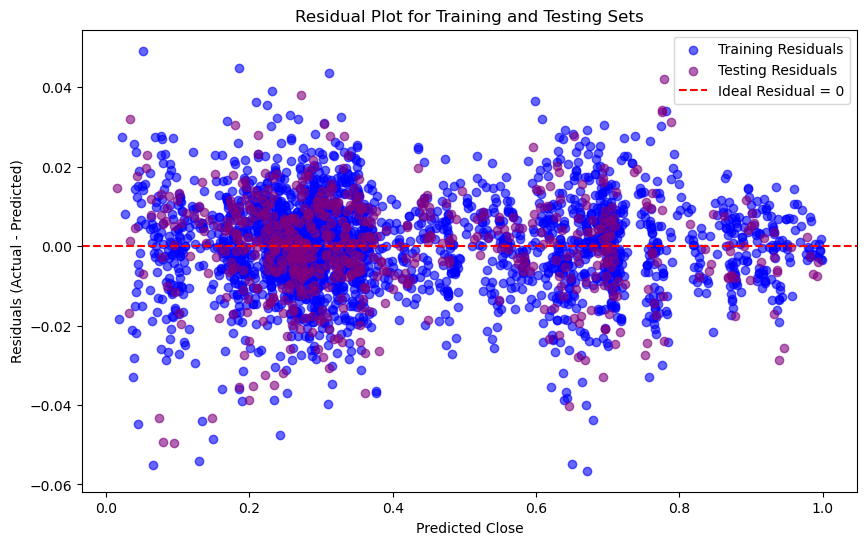

In [94]:
# Calculate residuals for both training and testing sets
y_train_pred = gam.predict(X_train)
y_test_pred = gam.predict(X_test)

# Residuals for training and testing sets
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plotting residuals for both training and testing
plt.figure(figsize=(10, 6))

# Plot training residuals
plt.scatter(y_train_pred, residuals_train, color='blue', alpha=0.6, label='Training Residuals')

# Plot testing residuals
plt.scatter(y_test_pred, residuals_test, color='purple', alpha=0.6, label='Testing Residuals')

# Adding a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--', label='Ideal Residual = 0')

# Labels and title
plt.xlabel('Predicted Close')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Training and Testing Sets')
plt.legend()
plt.show()